In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pydataset import data

#### Use seaborn's load_dataset function to load the iris database to answer the following questions:

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### What does the distribution of petal lengths look like?

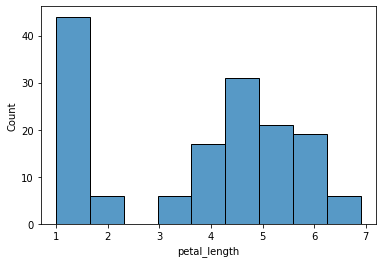

In [4]:
sns.histplot(iris.petal_length)
plt.show()

#### Is there a relationship between petal length and petal width?

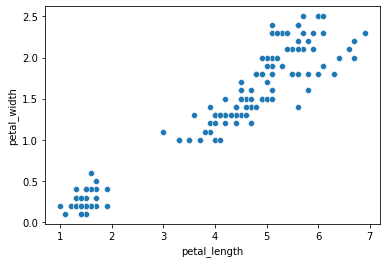

In [5]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width')
plt.show()

#### Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

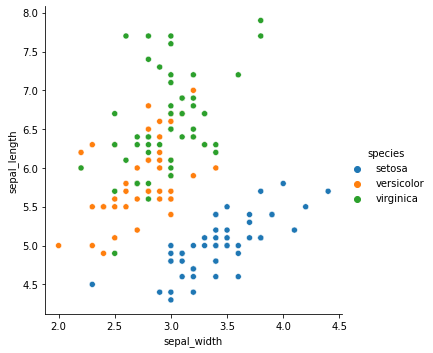

In [8]:
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue='species')
plt.show()

#### Which features would be best used to predict species?

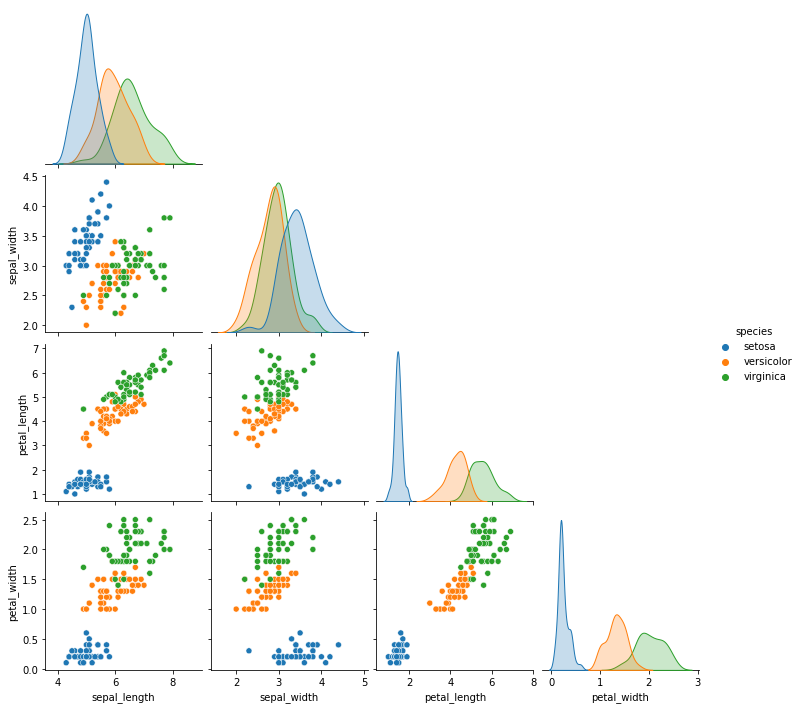

In [12]:
sns.pairplot(data=iris, corner=True, hue='species')
plt.show()

#### Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [15]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [16]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

#### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

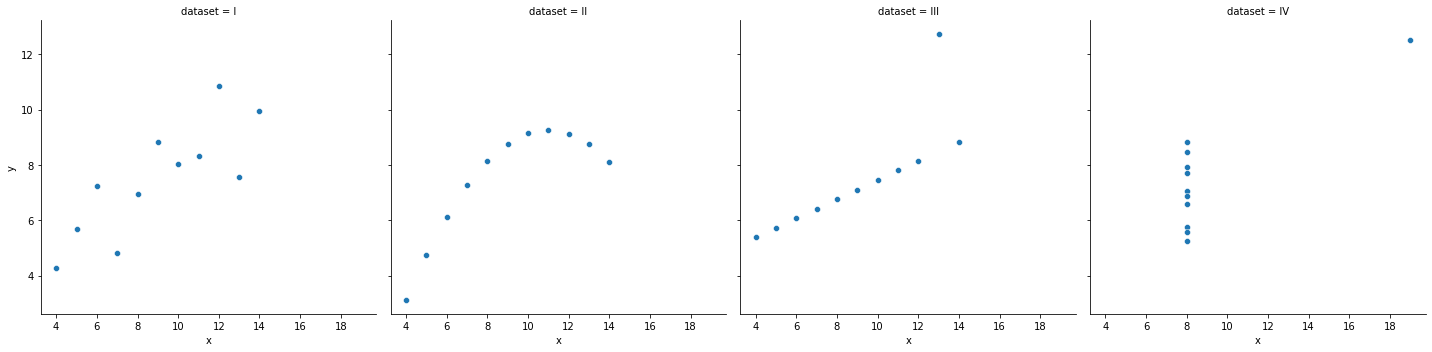

In [21]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset')
plt.show()

#### Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [34]:
# data('InsectSprays', show_doc=True)

In [26]:
insect = data('InsectSprays')
insect.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [27]:
insect.spray.value_counts()

A    12
B    12
C    12
D    12
E    12
F    12
Name: spray, dtype: int64

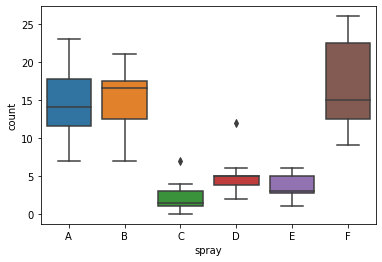

In [28]:
sns.boxplot(data=insect, x='spray', y='count')
plt.show()

#### Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:

In [36]:
# data('swiss', show_doc=True)

In [37]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


#### Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [39]:
swiss['is_catholic'] = swiss.Catholic > 50

In [40]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


#### Does whether or not a province is Catholic influence fertility?

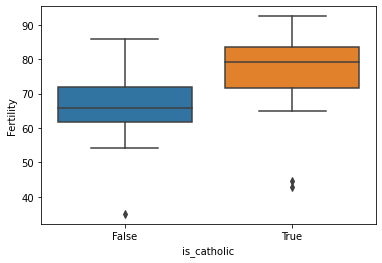

In [41]:
sns.boxplot(data=swiss, x='is_catholic', y='Fertility')
plt.show()

#### What measure correlates most strongly with fertility?

In [42]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


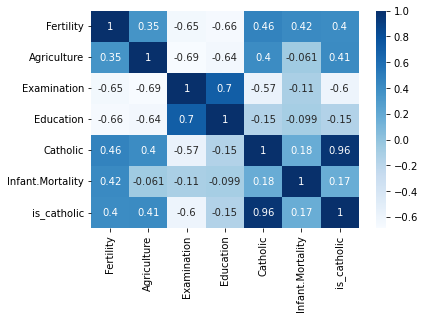

In [45]:
sns.heatmap(swiss.corr(), annot=True, cmap='Blues')
plt.show()

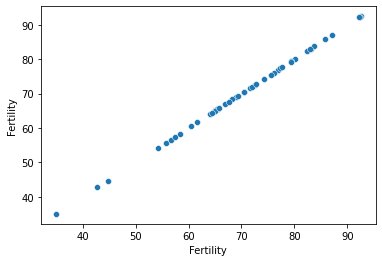

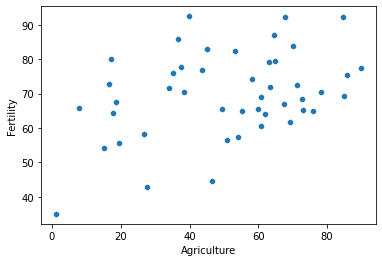

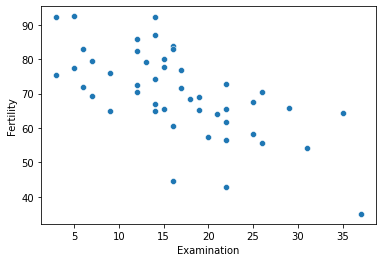

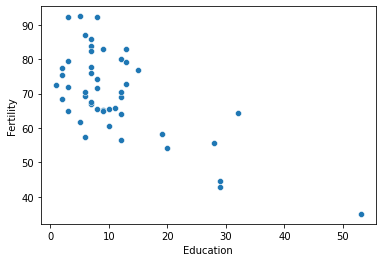

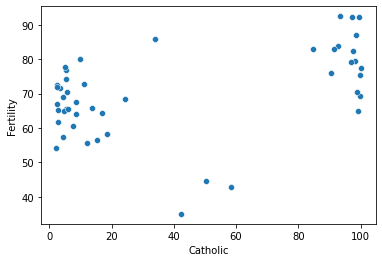

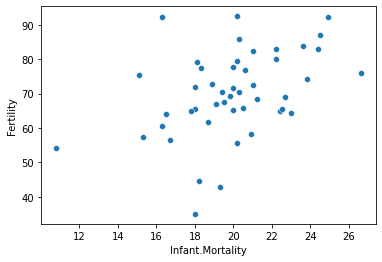

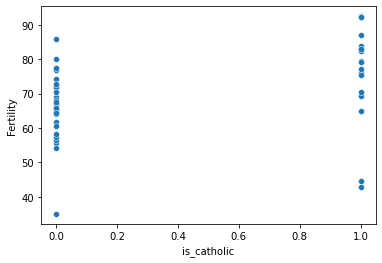

In [50]:
for col in swiss:
#     print(col)
    sns.scatterplot(data=swiss, y='Fertility', x=col)
    plt.show()

#### Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [51]:
import env

In [53]:
url = env.get_db_url('chipotle')

In [54]:
orders = pd.read_sql('select * from orders', url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [55]:
orders.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [57]:
orders.item_price = orders.item_price.str.strip('$').astype(float)

In [59]:
orders.dtypes

id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [61]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [67]:
pop_orders_4 = orders.groupby('item_name').quantity.sum().nlargest(4)
pop_orders_4

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [71]:
all_prices = orders.groupby('item_name').item_price.sum()
all_prices.head()

item_name
6 Pack Soft Drink        356.95
Barbacoa Bowl            672.36
Barbacoa Burrito         894.75
Barbacoa Crispy Tacos    120.21
Barbacoa Salad Bowl      106.40
Name: item_price, dtype: float64

In [73]:
pop_orders_4_price = pd.merge(pop_orders_4, all_prices, on='item_name', how='inner')
pop_orders_4_price = pop_orders_4_price.reset_index()
pop_orders_4_price

,item_name,quantity,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


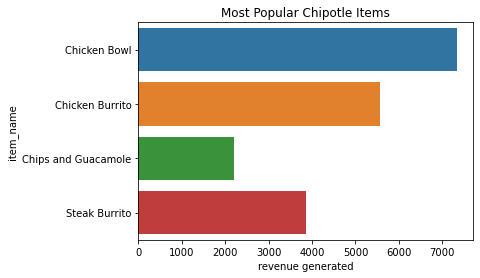

In [82]:
# plt.figure(figsize=(10,8))
sns.barplot(data=pop_orders_4_price, y='item_name', x='item_price')
plt.title('Most Popular Chipotle Items')
plt.xlabel('revenue generated')
plt.show()

#### Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [84]:
# data('sleepstudy', show_doc=True)

In [102]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [103]:
sleep.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

In [104]:
sleep.Subject.unique()

array([308, 309, 310, 330, 331, 332, 333, 334, 335, 337, 349, 350, 351,
       352, 369, 370, 371, 372])

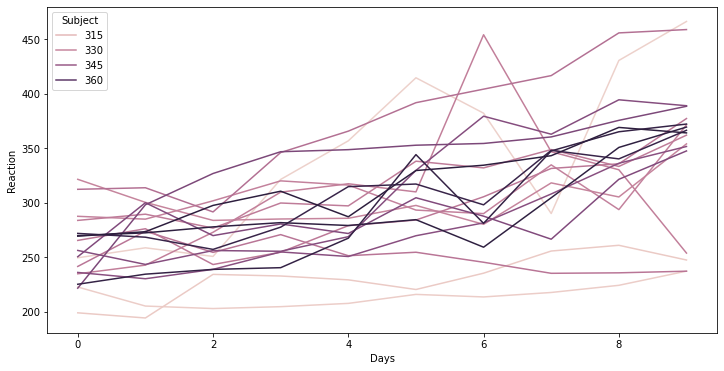

In [110]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sleep, x='Days', y='Reaction', hue='Subject')
plt.show()

In [91]:
sleep.Subject = sleep.Subject.astype(str)

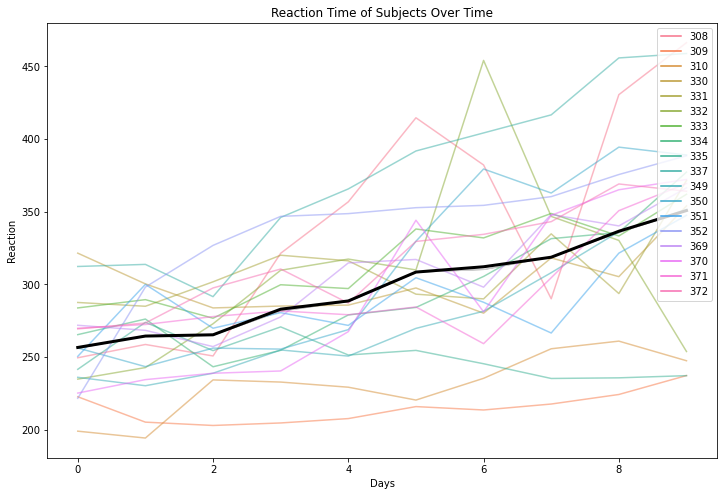

In [97]:
plt.figure(figsize=(12,8))

sns.lineplot(data=sleep, x='Days', y='Reaction', hue='Subject', alpha=.5)
sns.lineplot(data=sleep, x='Days', y='Reaction', 
             color = 'black', errorbar=('ci',False), linewidth=3)

plt.title('Reaction Time of Subjects Over Time')
plt.legend(loc='upper right')
plt.show()